In [89]:
#import the necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import time
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import missingno as msno
import warnings
import statsmodels.api as sm

warnings.filterwarnings('ignore')

In [90]:
df = pd.read_csv('Sample-Superstore.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [93]:
df = pd.read_csv('Sample-Superstore.csv')
cus_kmeans = df.groupby('Customer ID').sum().dropna()
cus_kmeans = cus_kmeans[['Sales', 'Quantity']]
cus_kmeans

,Sales,Quantity
Customer ID,,
AA-10315,5563.560,30
AA-10375,1056.390,41
AA-10480,1790.512,36
AA-10645,5086.935,64
AB-10015,886.156,13
...,...,...
XP-21865,2374.658,100
YC-21895,5454.350,31
YS-21880,6720.444,58


Text(0, 0.5, 'WCSS')

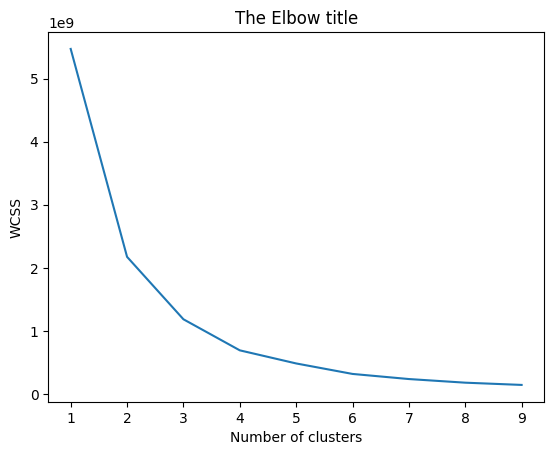

In [95]:
from sklearn.cluster import KMeans

wcss=[] #is the sum of the squared distance between each point and the centroid in a cluster.
for i in range (1,10):
    kmeans = KMeans(i)
    kmeans.fit(cus_kmeans)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1,10)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [102]:
kmeans = KMeans(3)
kmeans.fit(cus_kmeans)#Lấy 2 cột totalquantity và total price làm input
identified_clusters = kmeans.fit_predict(cus_kmeans)
cus_kmeans['Clusters'] = identified_clusters

cus_kmeans.head()

,Sales,Quantity,Clusters
Customer ID,,,
AA-10315,5563.560,30,0
AA-10375,1056.390,41,2
AA-10480,1790.512,36,2
AA-10645,5086.935,64,0
AB-10015,886.156,13,2


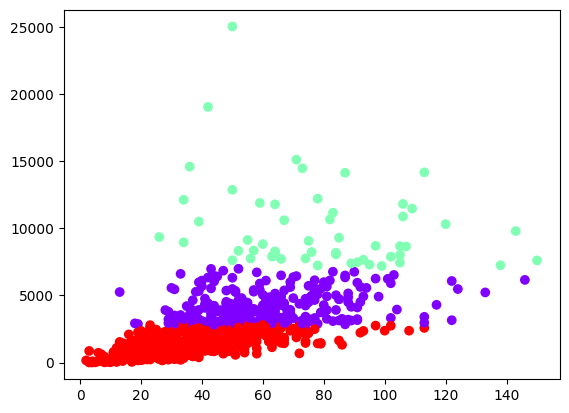

In [104]:
#Cần thêm xlab và ylab
plt.scatter(cus_kmeans['Quantity'],cus_kmeans['Sales'],c=cus_kmeans['Clusters'],cmap='rainbow')

# Kmode

In [81]:
df = pd.read_csv('Sample-Superstore.csv')
cus_kmeans = df.groupby('Customer ID').max().sort_index()
cus_sales = df.groupby('Customer ID').sum().sort_index()
cus_kmeans = cus_kmeans[['Segment', 'Postal Code', 'Region']]
# cus_kmeans['Sales'] = cus_sales['Sales']
# cus_kmeans['Profit'] = cus_sales['Profit']
cus_kmeans['Postal Code'] = cus_kmeans['Postal Code'].astype('category')
cus_kmeans['Segment'] = cus_kmeans['Segment'].astype('category')
cus_kmeans.info()

<class 'pandas.core.frame.DataFrame'>
Index: 793 entries, AA-10315 to ZD-21925
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Segment      793 non-null    category
 1   Postal Code  793 non-null    category
 2   Region       793 non-null    object  
dtypes: category(2), object(1)
memory usage: 20.3+ KB


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 1216.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 1216.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 1216.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 1216.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 1216.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 1159.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 1160.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Ru

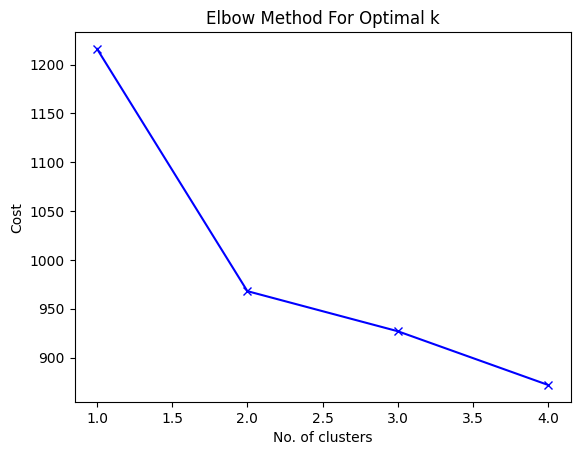

In [82]:
from kmodes.kmodes import KModes
# Elbow curve to find optimal K
cost = []
K = range(1,5)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(cus_kmeans)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [83]:
# Building the model with 3 clusters
kmode = KModes(n_clusters=2, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(cus_kmeans)

cus_kmeans.insert(0, "Cluster", clusters, True)
cus_kmeans

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 39, cost: 971.0
Run 1, iteration: 2/100, moves: 4, cost: 971.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 42, cost: 971.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 1214.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 1055.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 1143.0
Best run was number 1


,Cluster,Segment,Postal Code,Region
Customer ID,,,,
AA-10315,0,Consumer,94122,West
AA-10375,0,Consumer,97301,West
AA-10480,0,Consumer,65807,South
AA-10645,0,Consumer,94109,West
AB-10015,0,Consumer,98103,West
...,...,...,...,...
XP-21865,0,Consumer,95928,West
YC-21895,1,Corporate,94110,West
YS-21880,1,Corporate,98103,West


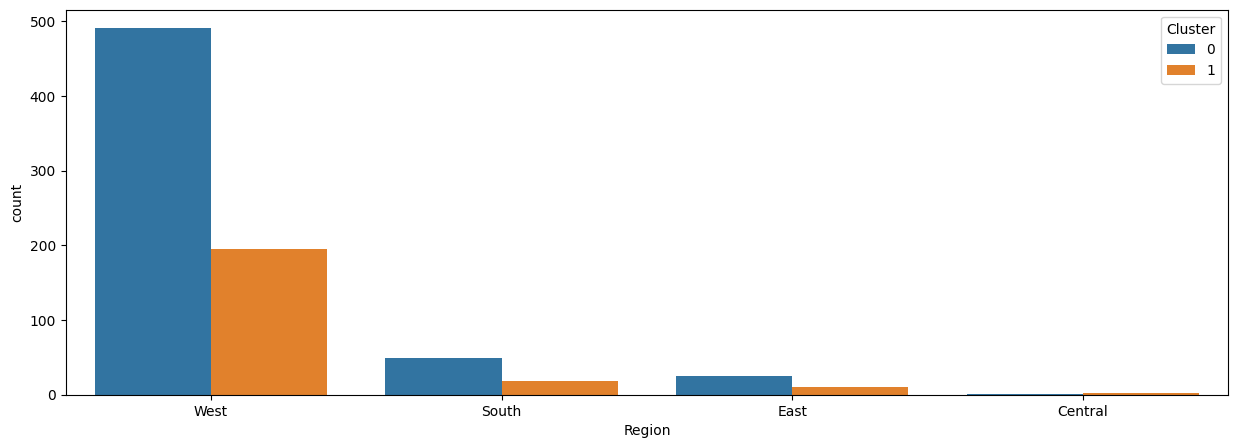

In [87]:
plt.subplots(figsize = (15,5))
sns.countplot(x=cus_kmeans['Region'],order=cus_kmeans['Region'].value_counts().index,hue=cus_kmeans['Cluster'])
plt.show()